In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Libraries (numpy and pandas)
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
#logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#random forest
from sklearn.ensemble import RandomForestClassifier
#MLP
from sklearn.neural_network import MLPClassifier

# to remove the error output for better view
import warnings
warnings.filterwarnings("ignore")

Data Preprocessing

In [ ]:
#Load Datasets
file_path = '/content/drive/My Drive/heart.csv'
df=pd.read_csv(file_path)
#df.head()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
#Feature Processing - One-Hot Encoding
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True, dtype=int)

In [ ]:
features = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType')
df = pd.concat([df, features], axis=1)
df = df.drop(['ChestPainType'], axis=1)

In [ ]:
features = pd.get_dummies(df['RestingECG'], prefix='RestingECG')
df = pd.concat([df, features], axis=1)
df = df.drop(['RestingECG'], axis=1)

In [ ]:
features = pd.get_dummies(df['ExerciseAngina'], prefix='ExerciseAngina')
df = pd.concat([df, features], axis=1)
df = df.drop(['ExerciseAngina'], axis=1)

In [ ]:
features = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope')
df = pd.concat([df, features], axis=1)
df = df.drop(['ST_Slope'], axis=1)

In [ ]:
#Load the data after transform
display(df)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,False,True,False,False,False,True,False,True,False,False,False,True
1,49,0,160,180,0,156,1.0,1,False,False,True,False,False,True,False,True,False,False,True,False
2,37,1,130,283,0,98,0.0,0,False,True,False,False,False,False,True,True,False,False,False,True
3,48,0,138,214,0,108,1.5,1,True,False,False,False,False,True,False,False,True,False,True,False
4,54,1,150,195,0,122,0.0,0,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,1,False,False,False,True,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,3.4,1,True,False,False,False,False,True,False,True,False,False,True,False
915,57,1,130,131,0,115,1.2,1,True,False,False,False,False,True,False,False,True,False,True,False
916,57,0,130,236,0,174,0.0,1,False,True,False,False,True,False,False,True,False,False,True,False


In [ ]:
# Specify the feature with missing values
feature_with_missing_values = 'Cholesterol'

# Calculate mean and standard deviation for the feature
mean = np.mean(df[feature_with_missing_values])
std_dev = np.std(df[feature_with_missing_values])

# Calculate z-scores for the feature
df['z_score'] = (df[feature_with_missing_values] - mean) / std_dev

# Define outlier threshold
threshold = 3

# Handle missing values by imputing with the mean of non-outlier values
non_outliers = df[np.abs(df['z_score']) <= threshold]
mean_non_outliers = np.mean(non_outliers[feature_with_missing_values])

# Impute missing values and outliers
df[feature_with_missing_values] = df[feature_with_missing_values].fillna(mean_non_outliers)
df.loc[np.abs(df['z_score']) > threshold, feature_with_missing_values] = mean_non_outliers

# Drop the z_score column as it's no longer needed
df = df.drop(columns=['z_score'])

# Define your target variable and features
target = 'HeartDisease'
features = df.drop(columns=[target])

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features)

In [ ]:
# Define age group bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Create a new 'AgeGroup' column based on the bins and labels
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'AgeGroup' column
display(df)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,AgeGroup
0,40,1,140,289.0,0,172,0.0,0,False,True,...,False,False,True,False,True,False,False,False,True,41-50
1,49,0,160,180.0,0,156,1.0,1,False,False,...,False,False,True,False,True,False,False,True,False,41-50
2,37,1,130,283.0,0,98,0.0,0,False,True,...,False,False,False,True,True,False,False,False,True,31-40
3,48,0,138,214.0,0,108,1.5,1,True,False,...,False,False,True,False,False,True,False,True,False,41-50
4,54,1,150,195.0,0,122,0.0,0,False,False,...,False,False,True,False,True,False,False,False,True,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264.0,0,132,1.2,1,False,False,...,True,False,True,False,True,False,False,True,False,41-50
914,68,1,144,193.0,1,141,3.4,1,True,False,...,False,False,True,False,True,False,False,True,False,61-70
915,57,1,130,131.0,0,115,1.2,1,True,False,...,False,False,True,False,False,True,False,True,False,51-60
916,57,0,130,236.0,0,174,0.0,1,False,True,...,False,True,False,False,True,False,False,True,False,51-60


Split datasets

In [ ]:
# Split the data into training (70%), validation (20%), and test sets (10%)
X_train, X_temp, y_train, y_temp = train_test_split(features, df[target], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)

Logistics Regression (Sigmoid) -- Baseline

In [ ]:
#Sigmoid Function
def sigmoid(z):
  z = np.array(z, dtype=np.float64)
  return 1/(1+np.exp(-z))


#Logistic Regression class
class LogisticRegression:
    def __init__(self, lr=0.1, n_iter=2000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        X = X.to_numpy().astype(np.float64)
        y = y.to_numpy()
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred_log_reg = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred_log_reg]
        return class_pred

    def predict_proba(self, X):
        X = X.to_numpy().astype(np.float64)
        linear_pred = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_pred)


In [ ]:
# Initialize and train the logistic regression model
log_reg_model = LogisticRegression(lr=0.1, n_iter=2000)
log_reg_model.fit(X_train, y_train)

# Make predictions on the training set to calculate training accuracy
y_train_pred_log_reg = log_reg_model.predict(X_train)
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg)
test_report_log_reg = classification_report(y_train, y_train_pred_log_reg)
print(f"Training Accuracy: {train_accuracy_log_reg}")
print("Training Classification Report:\n", test_report_log_reg)

# Make predictions on the validation set
y_val_pred_log_reg = log_reg_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_log_reg = accuracy_score(y_val, y_val_pred_log_reg)
val_report_log_reg = classification_report(y_val, y_val_pred_log_reg)

print(f"Validation Accuracy: {val_accuracy_log_reg}")
print("Validation Classification Report:\n", val_report_log_reg)

# Make predictions on the test set
y_test_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
test_report_log_reg = classification_report(y_test, y_test_pred_log_reg)

print(f"Test Accuracy: {test_accuracy_log_reg}")
print("Test Classification Report:\n", test_report_log_reg)

Training Accuracy: 0.5919003115264797
Training Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.18      0.29       298
           1       0.57      0.95      0.71       344

    accuracy                           0.59       642
   macro avg       0.66      0.56      0.50       642
weighted avg       0.66      0.59      0.52       642

Validation Accuracy: 0.6684782608695652
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.28      0.42        79
           1       0.64      0.96      0.77       105

    accuracy                           0.67       184
   macro avg       0.74      0.62      0.59       184
weighted avg       0.73      0.67      0.62       184

Test Accuracy: 0.6195652173913043
Test Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.09      0.15        33
           1       0.64     

Random Forest Algorithm

In [ ]:
#Random Forest Algorithm (Fine Tune)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=10,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training set to calculate training accuracy
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_report_rf= classification_report(y_train, y_train_pred_rf)
print(f"Training Accuracy: {train_accuracy_rf}")
print("Training Classification Report:\n", test_report_rf)

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_report_rf = classification_report(y_val, y_val_pred_rf)

print(f"Validation Accuracy: {val_accuracy_rf}")
print("Validation Classification Report:\n", val_report_rf)

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_report_rf = classification_report(y_test, y_test_pred_rf)

print(f"Test Accuracy: {test_accuracy_rf}")
print("Test Classification Report:\n", test_report_rf)

Training Accuracy: 0.9828660436137072
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       298
           1       0.98      0.99      0.98       344

    accuracy                           0.98       642
   macro avg       0.98      0.98      0.98       642
weighted avg       0.98      0.98      0.98       642

Validation Accuracy: 0.8804347826086957
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        79
           1       0.90      0.89      0.89       105

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Test Accuracy: 0.8695652173913043
Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.93     

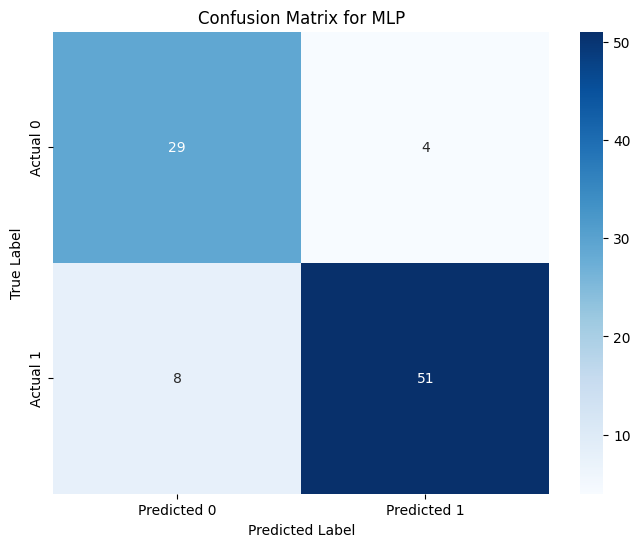

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_MLP = confusion_matrix(y_test, y_test_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_MLP, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Multi-Layer Perceptron (MLP)

In [ ]:
# MLP Classifier (Fine tune)
MLP_model = MLPClassifier(hidden_layer_sizes=(256, 128, 64,), activation='relu', batch_size = 64, max_iter=1000, random_state=42)
MLP_model.fit(X_train, y_train)

# Make predictions on the training set to calculate training accuracy
y_train_pred_MLP = MLP_model.predict(X_train)
train_accuracy_MLP = accuracy_score(y_train, y_train_pred_MLP)
test_report_MLP = classification_report(y_train, y_train_pred_MLP)
print(f"Training Accuracy: {train_accuracy_MLP}")
print("Training Classification Report:\n", test_report_MLP)

# Make predictions on the validation set
y_val_pred_MLP = MLP_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_MLP = accuracy_score(y_val, y_val_pred_MLP)
val_report_MLP = classification_report(y_val, y_val_pred_MLP)

print(f"Validation Accuracy: {val_accuracy_MLP}")
print("Validation Classification Report:\n", val_report_MLP)

# Make predictions on the test set
y_test_pred_MLP = MLP_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_MLP = accuracy_score(y_test, y_test_pred_MLP)
test_report_MLP = classification_report(y_test, y_test_pred_MLP)

print(f"Test Accuracy: {test_accuracy_MLP}")
print("Test Classification Report:\n", test_report_MLP)

Training Accuracy: 0.8489096573208723
Training Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       298
           1       0.82      0.92      0.87       344

    accuracy                           0.85       642
   macro avg       0.86      0.84      0.85       642
weighted avg       0.85      0.85      0.85       642

Validation Accuracy: 0.8804347826086957
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.86        79
           1       0.87      0.92      0.90       105

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

Test Accuracy: 0.8152173913043478
Test Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.84     

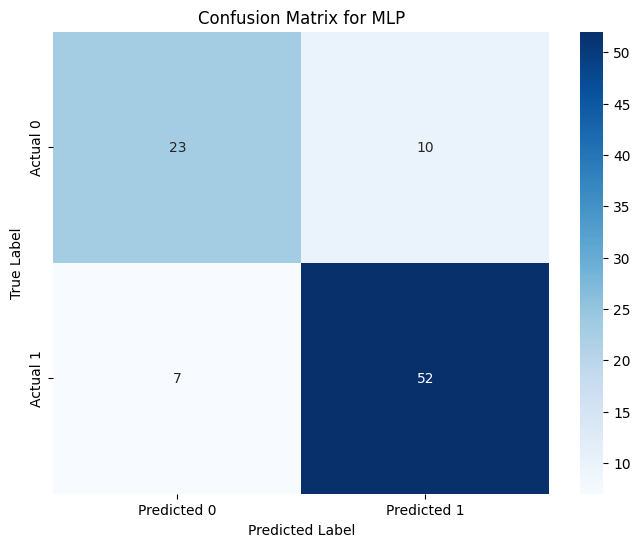

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_MLP = confusion_matrix(y_test, y_test_pred_MLP)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_MLP, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

XG Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost classifier with anti-overfitting settings
XGB_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=3,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

# Fit the model with evaluation set for early stopping
XGB_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set
    verbose=True,
    #early_stopping_rounds=10  # Add early stopping
)

# Evaluate on the training set
y_train_pred_XGB = XGB_model.predict(X_train)
train_accuracy_XGB = accuracy_score(y_train, y_train_pred_XGB)
train_report_XGB = classification_report(y_train, y_train_pred_XGB, digits=4)
print(f"Training Accuracy: {train_accuracy_XGB:.4f}")
print("Training Classification Report:\n")
print(train_report_XGB)

# Evaluate on the validation set
y_val_pred_XGB = XGB_model.predict(X_val)
val_accuracy_XGB = accuracy_score(y_val, y_val_pred_XGB)
val_report_XGB = classification_report(y_val, y_val_pred_XGB, digits=4)
print(f"Validation Accuracy: {val_accuracy_XGB:.4f}")
print("Validation Classification Report:\n")
print(val_report_XGB)

# Evaluate on the test set
y_test_pred_XGB = XGB_model.predict(X_test)
test_accuracy_XGB = accuracy_score(y_test, y_test_pred_XGB)
test_report_XGB = classification_report(y_test, y_test_pred_XGB, digits=4)
print(f"Test Accuracy: {test_accuracy_XGB:.4f}")
print("Test Classification Report:\n")
print(test_report_XGB)

[0]	validation_0-logloss:0.66178
[1]	validation_0-logloss:0.64296
[2]	validation_0-logloss:0.62342
[3]	validation_0-logloss:0.60709
[4]	validation_0-logloss:0.58916
[5]	validation_0-logloss:0.57395
[6]	validation_0-logloss:0.55836
[7]	validation_0-logloss:0.54276
[8]	validation_0-logloss:0.52926
[9]	validation_0-logloss:0.51857
[10]	validation_0-logloss:0.50830
[11]	validation_0-logloss:0.49786
[12]	validation_0-logloss:0.48817
[13]	validation_0-logloss:0.47987
[14]	validation_0-logloss:0.47110
[15]	validation_0-logloss:0.46138
[16]	validation_0-logloss:0.45265
[17]	validation_0-logloss:0.44552
[18]	validation_0-logloss:0.43893
[19]	validation_0-logloss:0.43213
[20]	validation_0-logloss:0.42549
[21]	validation_0-logloss:0.42096
[22]	validation_0-logloss:0.41507
[23]	validation_0-logloss:0.40972
[24]	validation_0-logloss:0.40476
[25]	validation_0-logloss:0.40035
[26]	validation_0-logloss:0.39508
[27]	validation_0-logloss:0.38995
[28]	validation_0-logloss:0.38661
[29]	validation_0-loglos

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=3,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

# Fit the model with evaluation set for early stopping
XGB_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set
    verbose=True,
    early_stopping = 10  # Add early stopping
)

# Evaluate on the training set
y_train_pred_XGB = XGB_model.predict(X_train)
train_accuracy_XGB = accuracy_score(y_train, y_train_pred_XGB)  # Calculate training accuracy
train_report_XGB = classification_report(y_train, y_train_pred_XGB, digits=4)
print(f"Training Accuracy: {train_accuracy_XGB:.4f}")
print("Training Classification Report:\n")
print(train_report_XGB)

# Evaluate on the validation set
y_val_pred_XGB = XGB_model.predict(X_val)
val_accuracy_XGB = accuracy_score(y_val, y_val_pred_XGB)  # Calculate validation accuracy
val_report_XGB = classification_report(y_val, y_val_pred_XGB, digits=4)
print(f"Validation Accuracy: {val_accuracy_XGB:.4f}")
print("Validation Classification Report:\n")
print(val_report_XGB)

# Evaluate on the test set
y_test_pred_XGB = XGB_model.predict(X_test)
test_accuracy_XGB = accuracy_score(y_test, y_test_pred_XGB)  # Calculate test accuracy
test_report_XGB = classification_report(y_test, y_test_pred_XGB, digits=4)
print(f"Test Accuracy: {test_accuracy_XGB:.4f}")
print("Test Classification Report:\n")
print(test_report_XGB)

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping'

To display the comparative analysis

In [ ]:
# Assuming `df` is the processed dataset with features and labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target (y)
X = df.drop('HeartDisease', axis=1)  # Replace 'target' with the actual target column name
y = df['HeartDisease']

# Split the data into training (70%), validation (20%), and test sets (10%)
X_train, X_temp, y_train, y_temp = train_test_split(features, df[target], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)

# Logistic Regression class
class LogisticRegression:
    def __init__(self, lr=0.1, n_iter=2000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        X = X.to_numpy().astype(np.float64)
        y = y.to_numpy()
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):  # Correctly indented within the class definition
        X = X.to_numpy().astype(np.float64)
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred_log_reg = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred_log_reg]
        return class_pred

    def predict_proba(self, X):  # Added predict_proba method
        X = X.to_numpy().astype(np.float64)
        linear_pred = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_pred)


# Dictionary to store results
results = {}

# 1. Logistic Regression
log_reg_model = LogisticRegression(lr=0.1, n_iter=2000)
log_reg_model.fit(X_train, y_train)
y_val_pred_log_reg = log_reg_model.predict(X_val)
y_proba_log_reg = log_reg_model.predict_proba(X_val) # Changed to predict_proba to get probabilities

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_val, y_val_pred_log_reg),
    'Precision': precision_score(y_val, y_val_pred_log_reg),
    'Recall': recall_score(y_val, y_val_pred_log_reg),
    'F1 Score': f1_score(y_val, y_val_pred_log_reg),
    'AUC-ROC': roc_auc_score(y_val, y_proba_log_reg)
}

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_val, y_pred_rf),
    'Precision': precision_score(y_val, y_pred_rf),
    'Recall': recall_score(y_val, y_pred_rf),
    'F1 Score': f1_score(y_val, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_val, y_proba_rf)
}

# 3. Multi-Layer Perceptron (MLP)
MLP_model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', random_state=42, max_iter=300)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_val)
y_proba_MLP = MLP_model.predict_proba(X_val)[:, 1]

results['Multi-Layer Perceptron'] = {
    'Accuracy': accuracy_score(y_val, y_pred_MLP),
    'Precision': precision_score(y_val, y_pred_MLP),
    'Recall': recall_score(y_val, y_pred_MLP),
    'F1 Score': f1_score(y_val, y_pred_MLP),
    'AUC-ROC': roc_auc_score(y_val, y_proba_MLP)
}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression     0.668478   0.639241  0.961905  0.768061  0.617601
Random Forest           0.896739   0.913462  0.904762  0.909091  0.944424
Multi-Layer Perceptron  0.891304   0.904762  0.904762  0.904762  0.925859


In [ ]:
from sklearn.metrics import roc_auc_score

# For Logistic Regression (assuming your model is named 'log_reg_model')
log_reg_model = LogisticRegression(lr=0.1, n_iter=2000)
log_reg_model.fit(X_train, y_train)
y_pred_proba_log_reg = log_reg_model.predict(X_val)

# For Random Forest (assuming your model is named 'rf_model')
y_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# For MLP (assuming your model is named 'MLP_model')
y_pred_proba_mlp = MLP_model.predict_proba(X_val)[:, 1]

auc_log_reg = roc_auc_score(y_val, y_pred_proba_log_reg)
print(f"Logistic Regression AUC-ROC: {auc_log_reg}")

auc_rf = roc_auc_score(y_val, y_pred_proba_rf)
print(f"Random Forest AUC-ROC: {auc_rf}")

auc_mlp = roc_auc_score(y_val, y_pred_proba_mlp)
print(f"MLP AUC-ROC: {auc_mlp}")

results = {
       "Logistic Regression": auc_log_reg,
       "Random Forest": auc_rf,
       "MLP": auc_mlp
   }

# Or using pandas DataFrame:
#results_df = pd.DataFrame({"Model": list(results.keys()), "AUC-ROC": list(results.values())})
#print(results_df)

Logistic Regression AUC-ROC: 0.620192887281495
Random Forest AUC-ROC: 0.9460518384569019
MLP AUC-ROC: 0.9299578059071729
